<a href="https://colab.research.google.com/github/sheha919/Cobaltocenium_project/blob/main/ml_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries

In [265]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config
set_config(display='diagram')
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [266]:
df=pd.read_excel('/content/cobaltocenium_data.xlsx')
df.head()

,Unnamed: 0,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903 entries, 0 to 902
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   903 non-null    int64  
 1   Name                         903 non-null    object 
 2   Co[CpY][CpY']OH energy (Eh)  903 non-null    float64
 3   CoCpY' name                  903 non-null    object 
 4   CoCpY'energy (Eh)            903 non-null    float64
 5   CpY name                     903 non-null    object 
 6   CpY energy (Eh)              903 non-null    float64
 7   BDE (kcal/mol)               903 non-null    float64
 8   Dipole moment(Debye)         903 non-null    float64
 9   EHOMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 10  ELUMO(Co[CpY][CpY']OH) (Eh)  903 non-null    float64
 11  EHOMO(CoCpY'OH) (Eh)         903 non-null    float64
 12  ELUMO(CoCpY'OH) (Eh)         903 non-null    float64
 13  EHOMO(CpY) (Eh)     

In [268]:
ml_df=df.copy()

In [269]:
ml_df=ml_df.drop(columns=['Unnamed: 0'], axis = 1)
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


#Data Vizualizations

In [270]:
sub= np.array(ml_df['CpY name'].value_counts().index)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matp

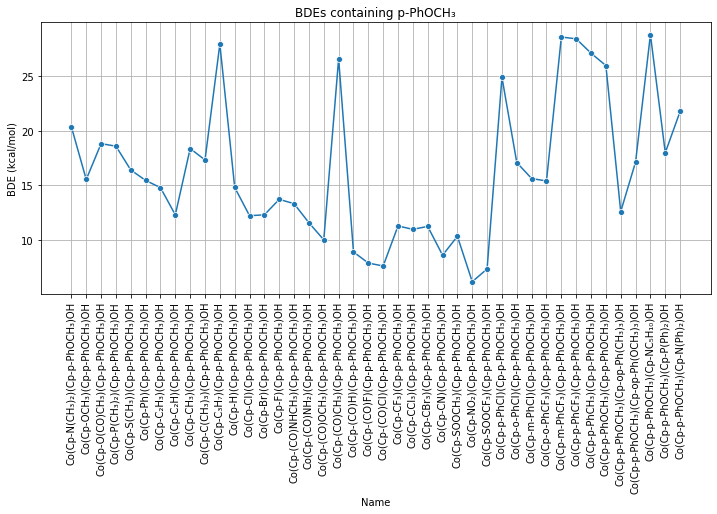

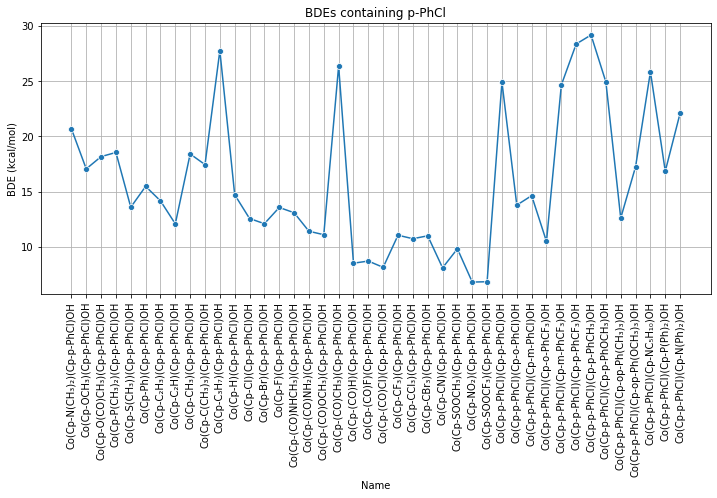

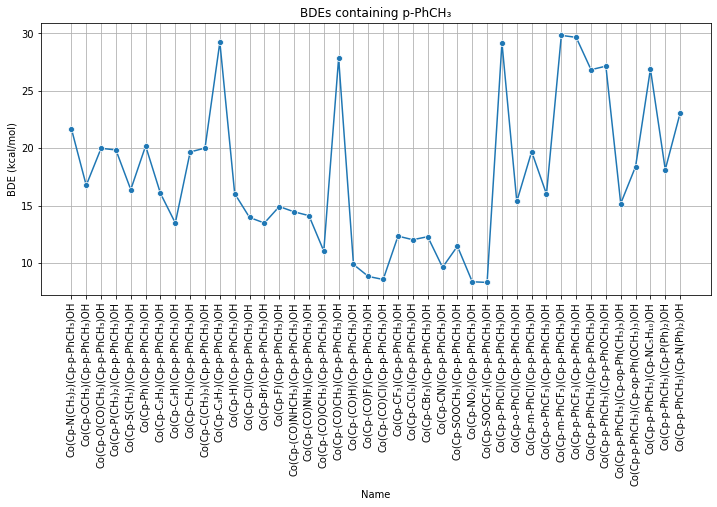

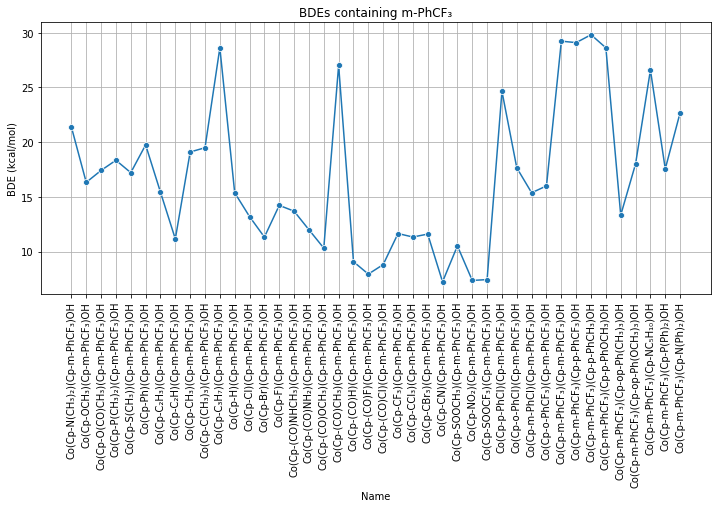

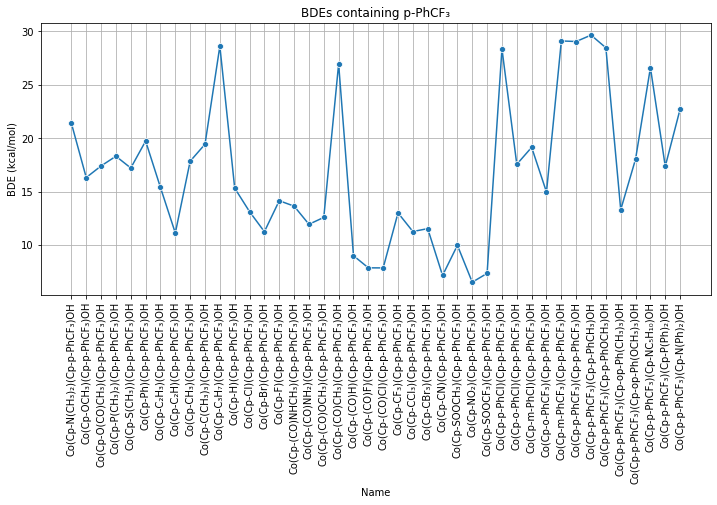

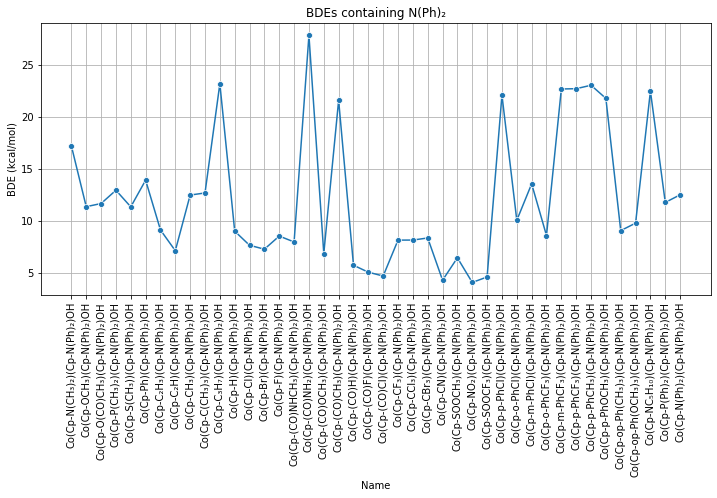

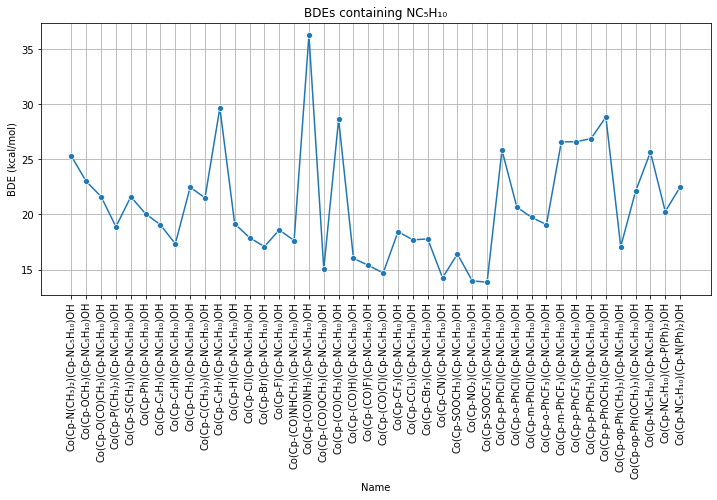

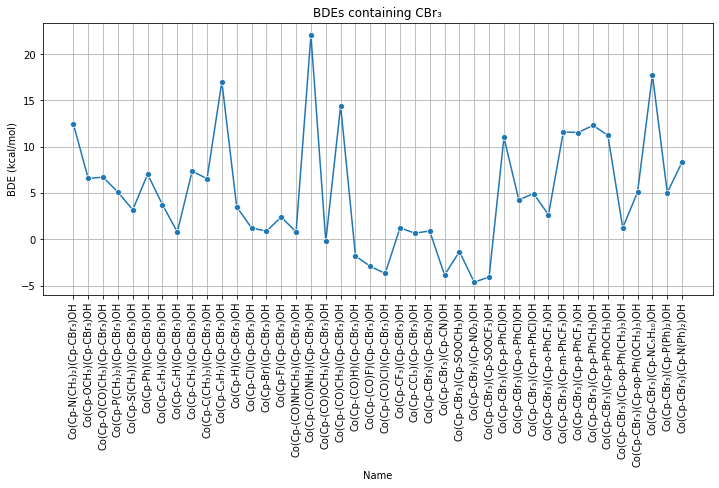

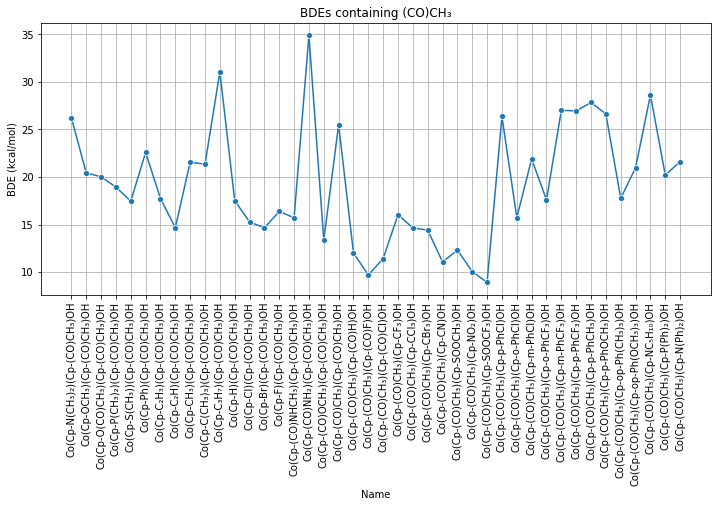

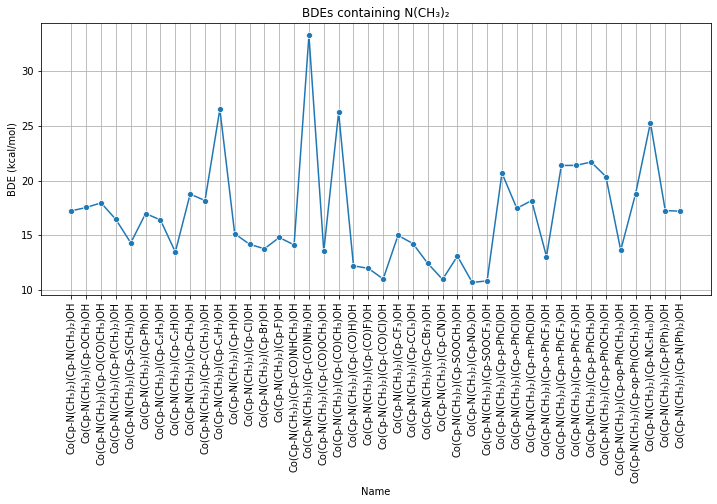

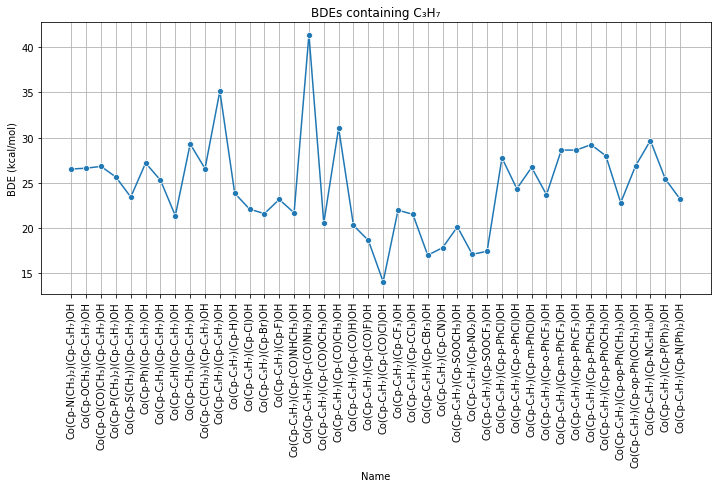

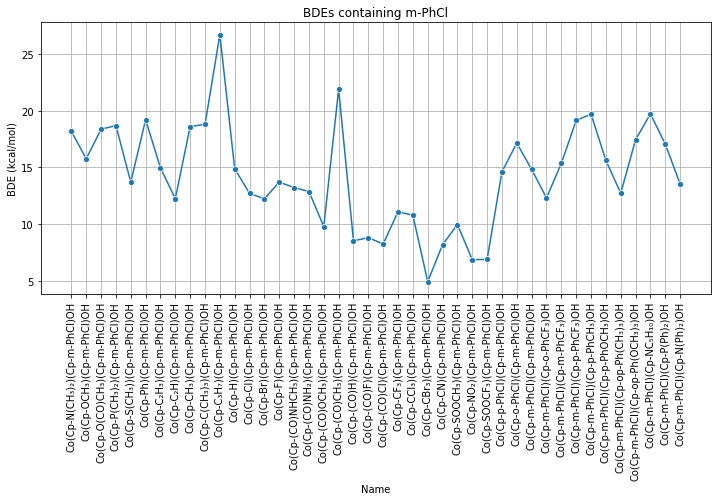

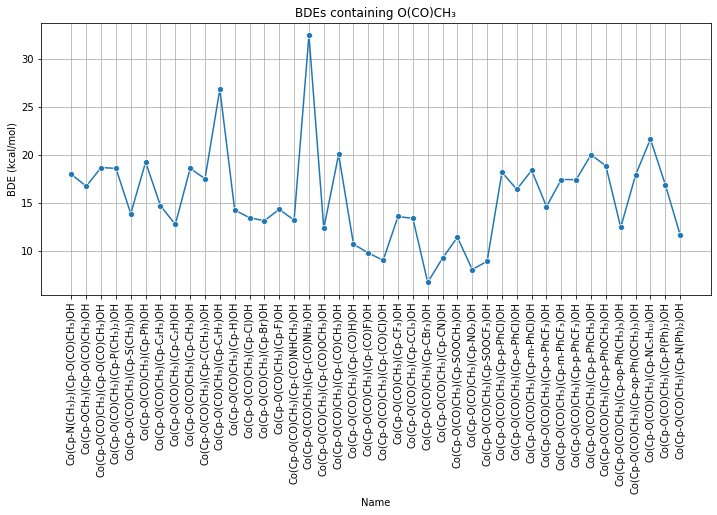

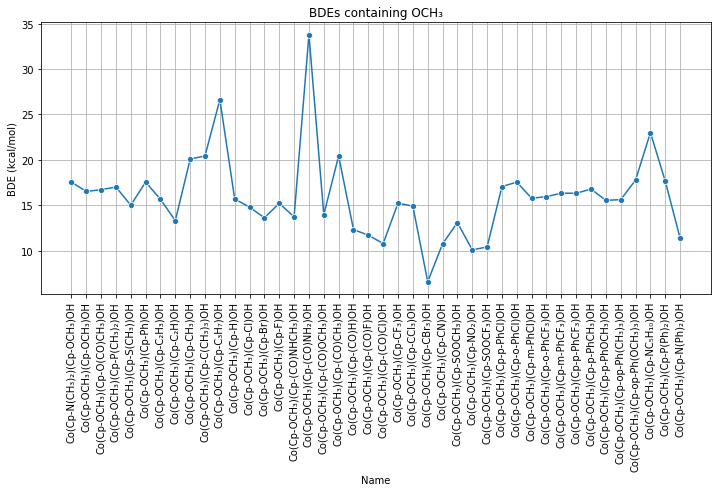

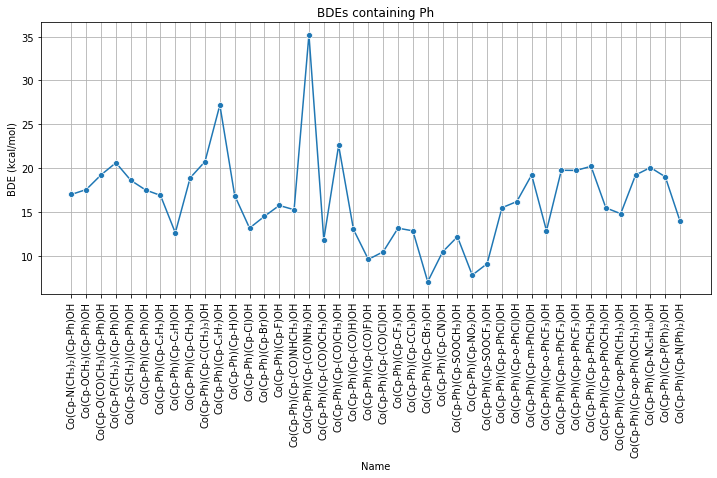

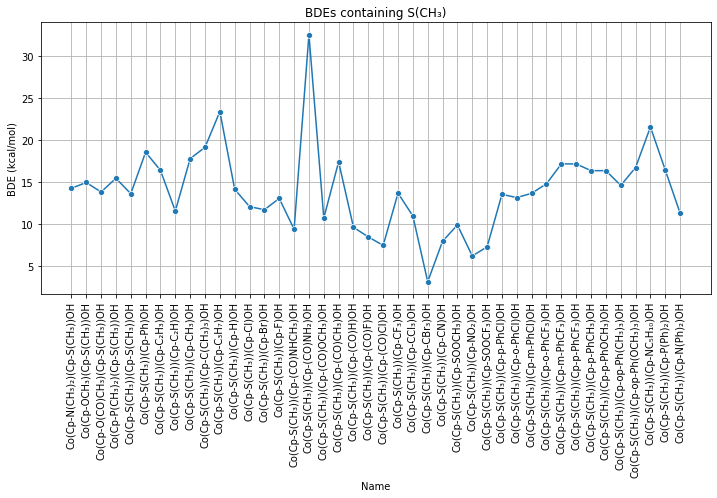

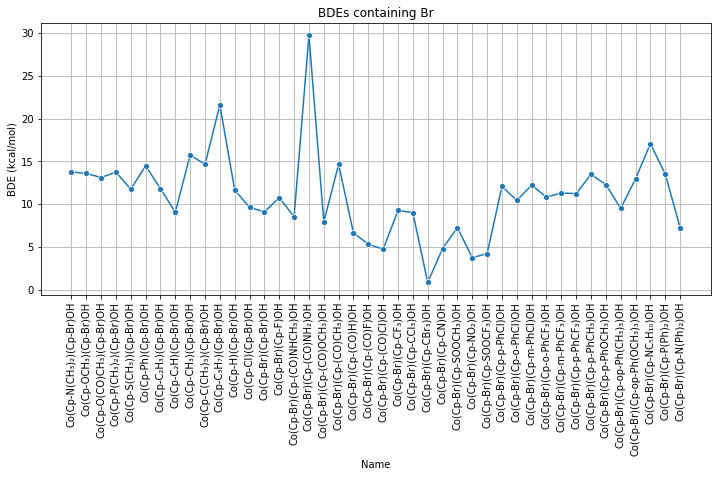

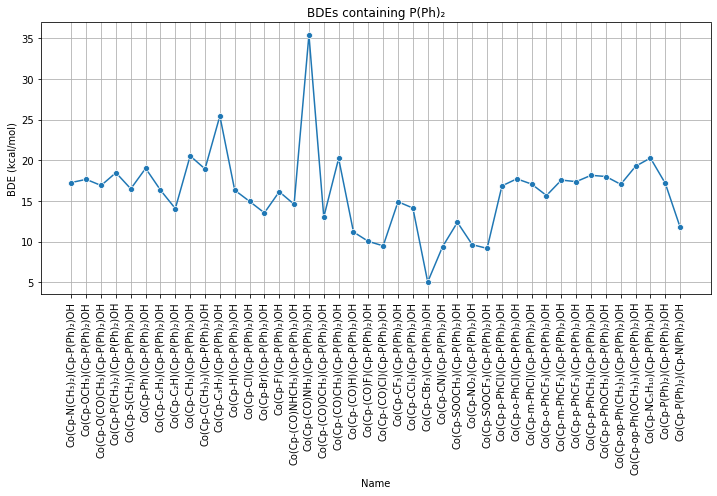

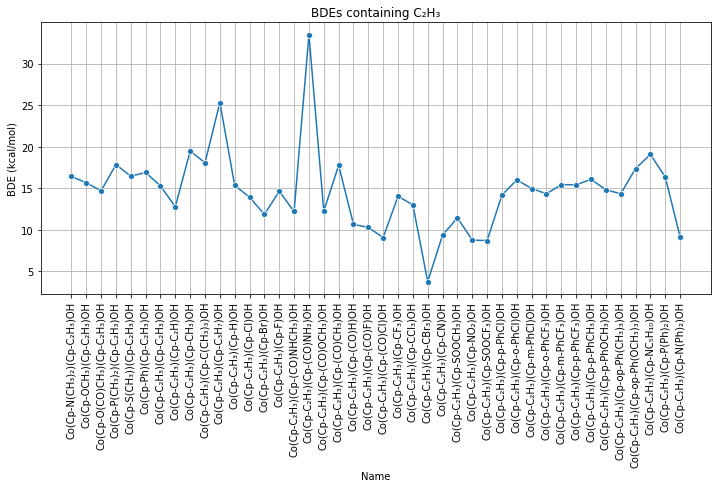

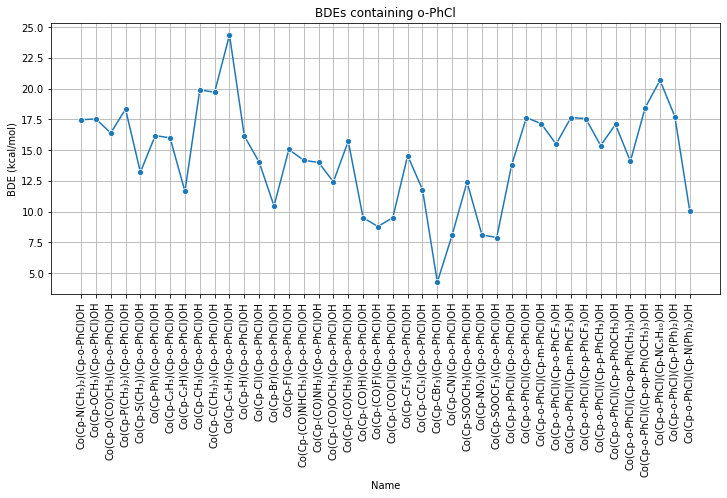

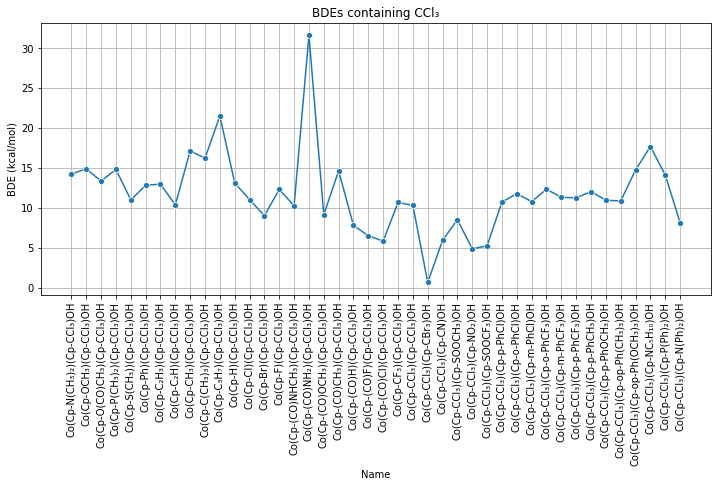

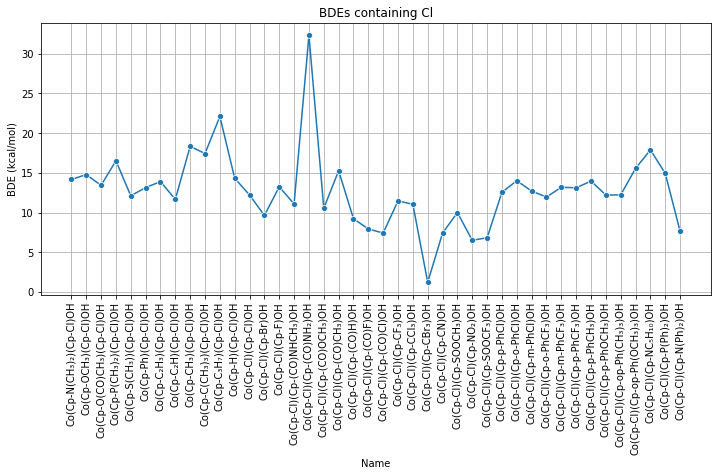

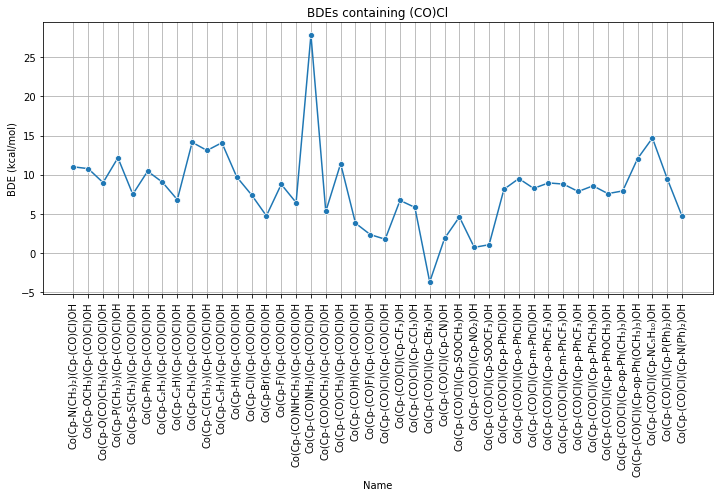

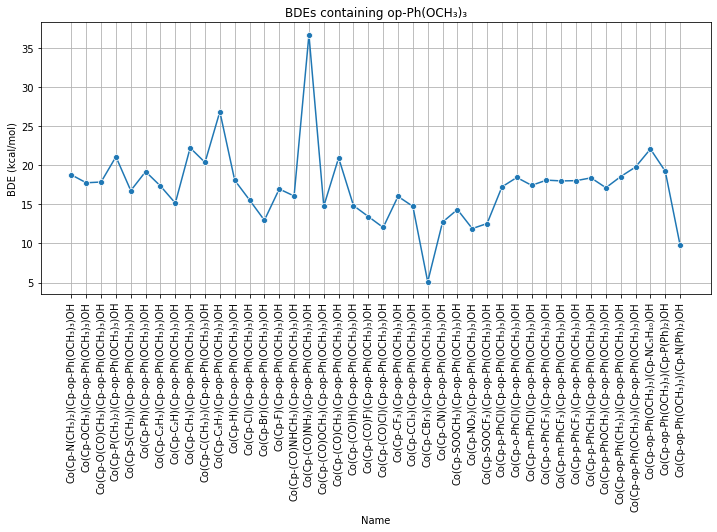

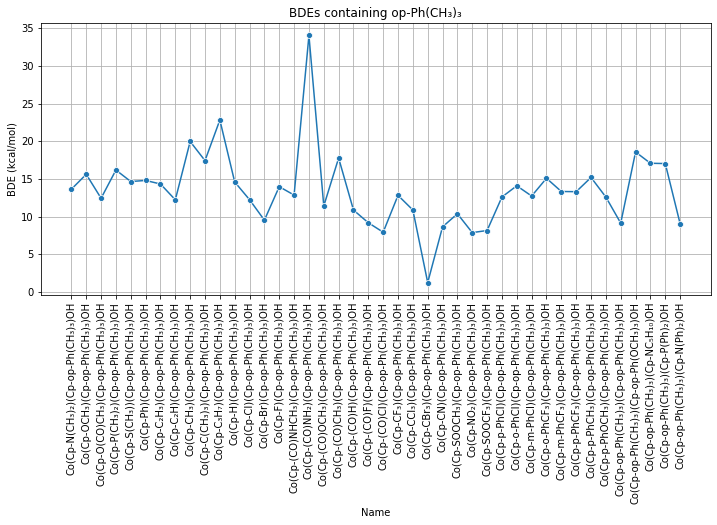

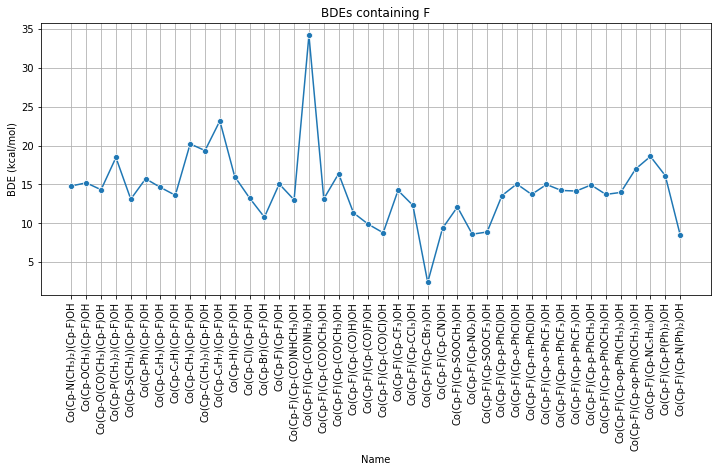

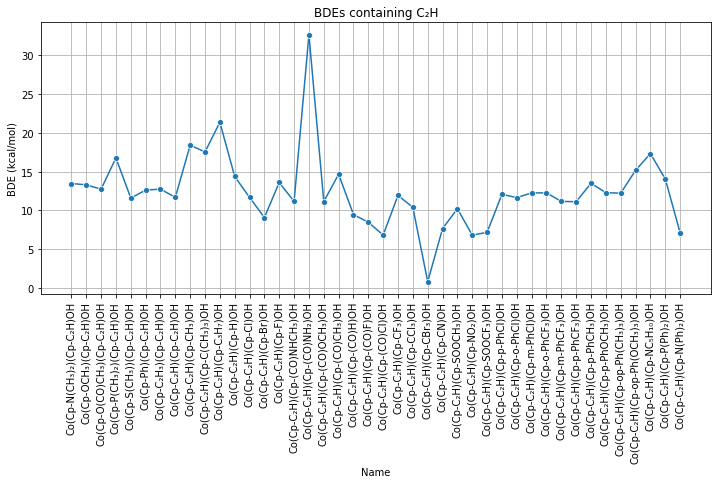

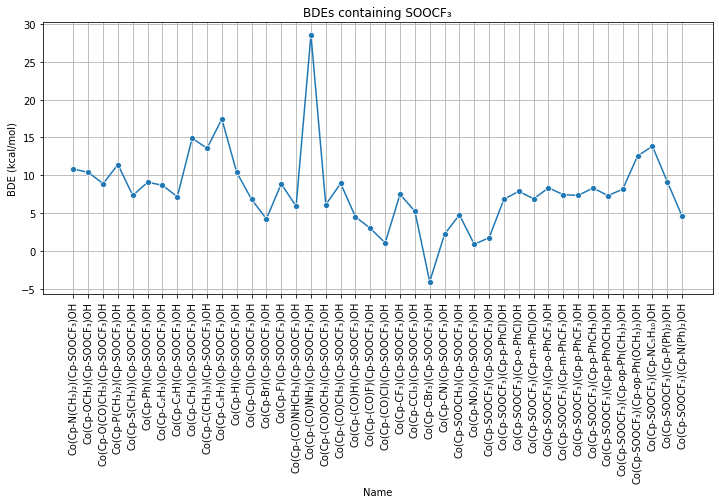

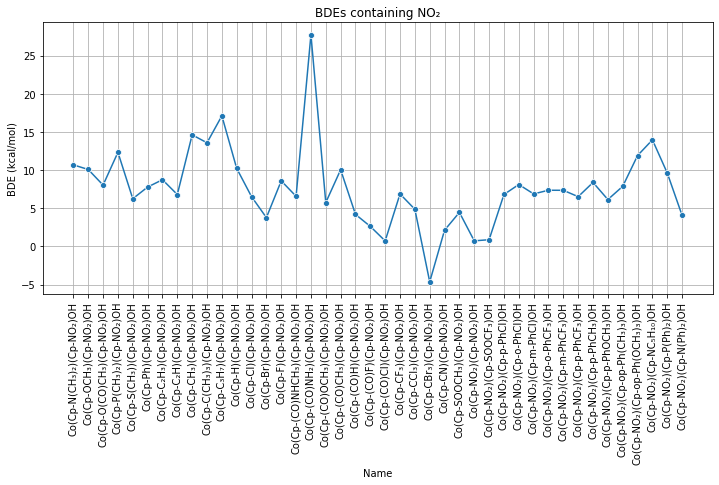

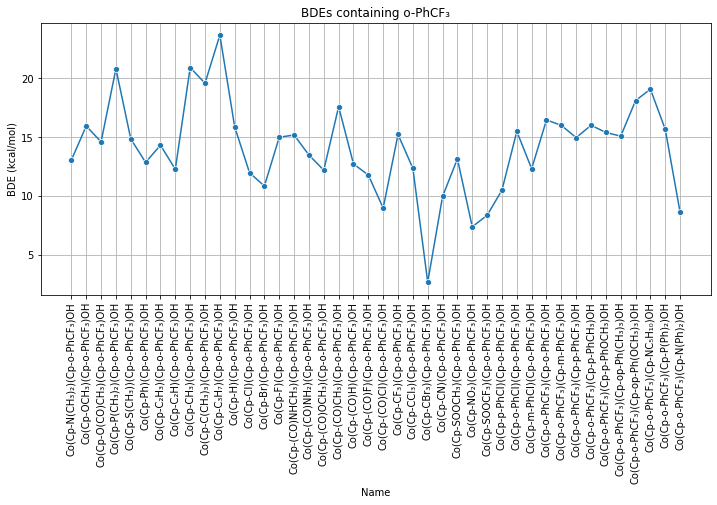

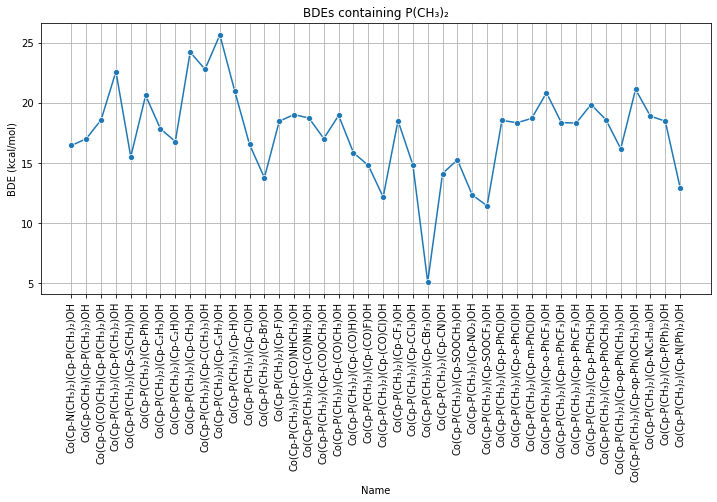

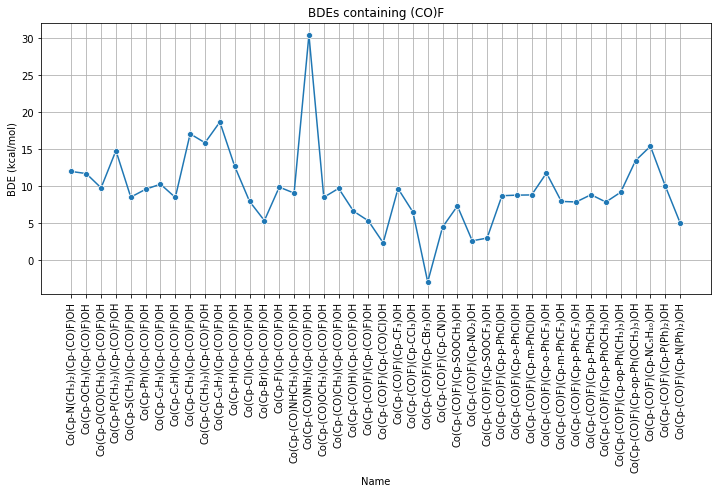

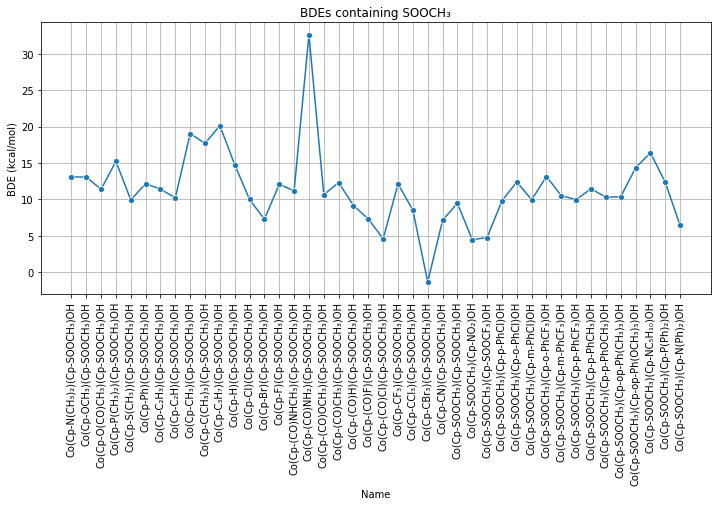

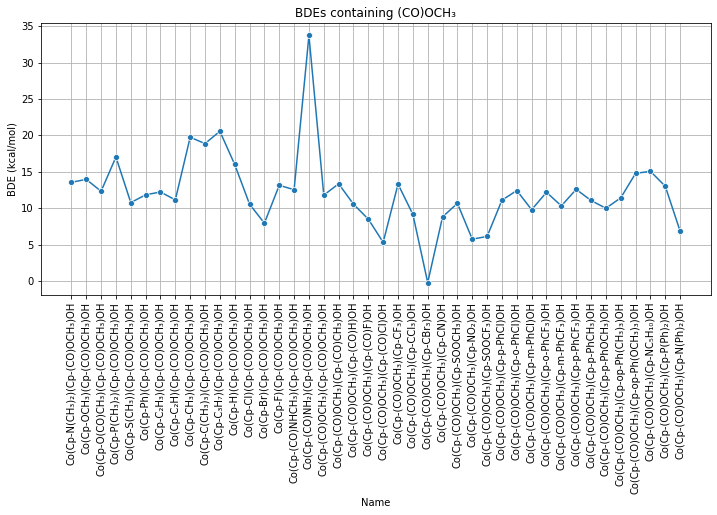

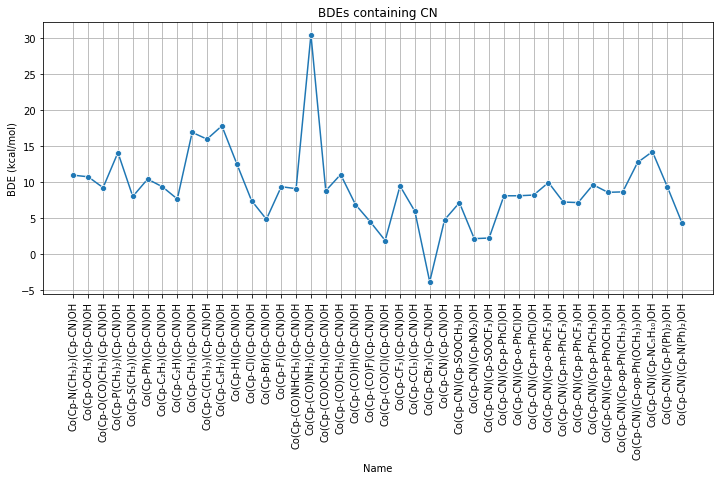

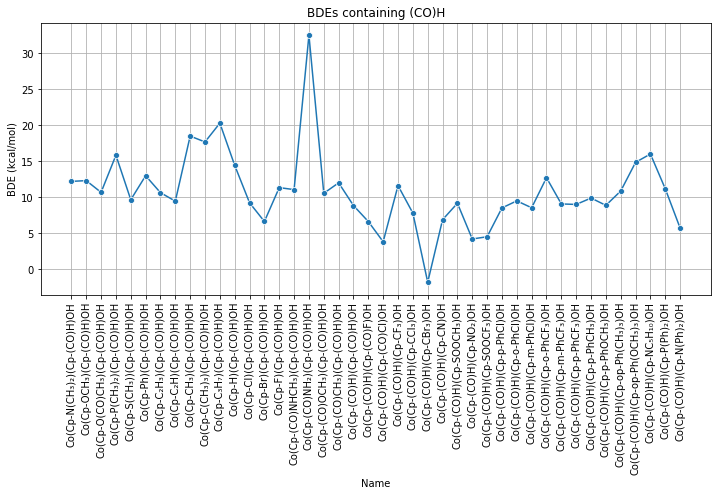

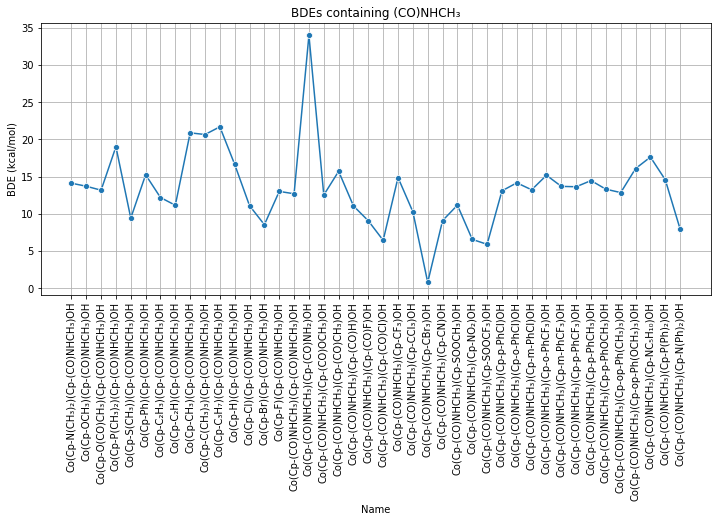

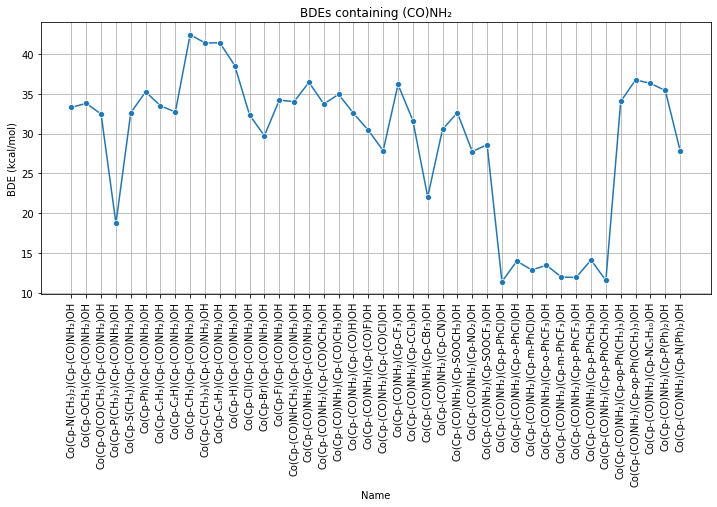

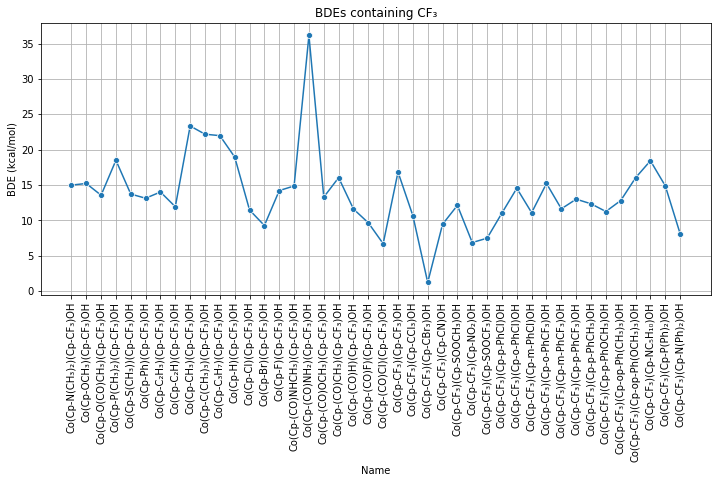

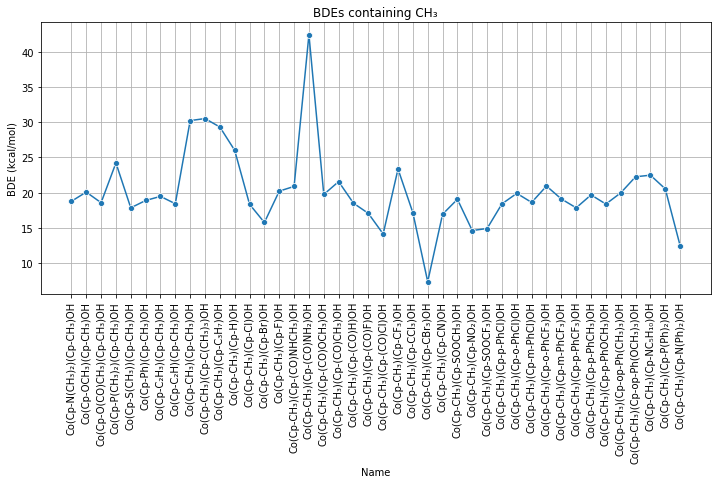

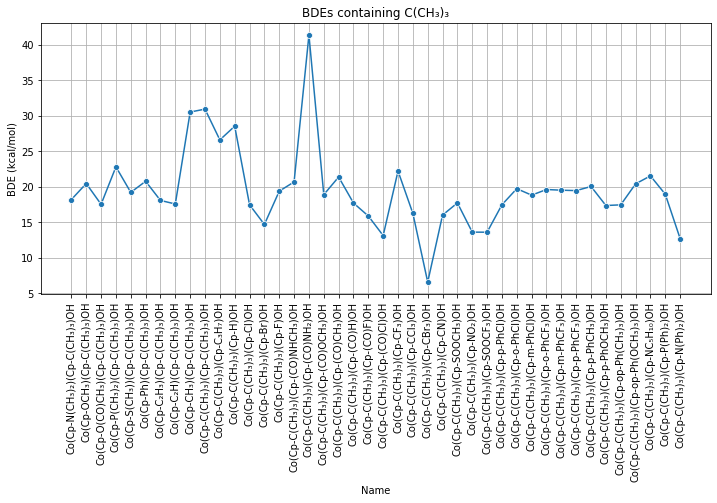

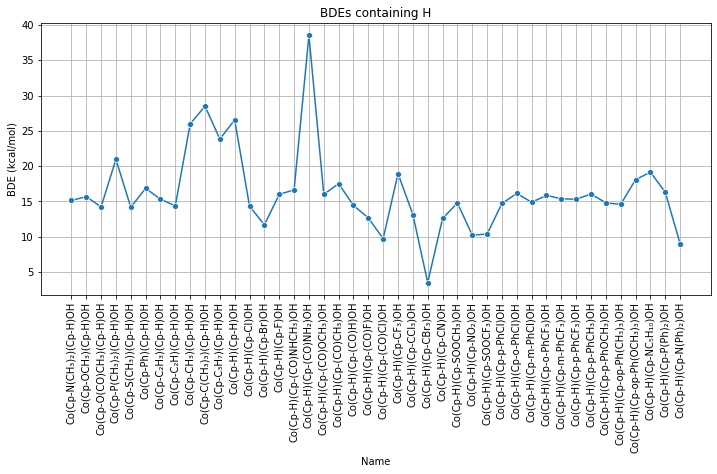

In [271]:
for i in range(len(sub)):
  temp=ml_df[(ml_df["CoCpY' name"]==sub[i])|(ml_df['CpY name']==sub[i])]
  plt.figure(figsize=(12,5))
  sns.lineplot(data=temp, x='Name', y='BDE (kcal/mol)',marker='o', dashes=True)
  plt.title(f'BDEs containing {sub[i]}')
  plt.grid()
  plt.xticks(rotation=90);






    

#Filter Data

In [272]:
#BDE data greater than 3kcal/mol
drop_bde = (ml_df[ml_df['BDE (kcal/mol)']<=3])
len(drop_bde)

30

In [273]:
drop_bde['Name']

290            Co(Cp-C₂H)(Cp-CBr₃)OH
450             Co(Cp-Cl)(Cp-CBr₃)OH
479             Co(Cp-Br)(Cp-CBr₃)OH
507              Co(Cp-F)(Cp-CBr₃)OH
534      Co(Cp-(CO)NHCH₃)(Cp-CBr₃)OH
585       Co(Cp-(CO)OCH₃)(Cp-CBr₃)OH
632          Co(Cp-(CO)H)(Cp-CBr₃)OH
651        Co(Cp-(CO)F)(Cp-(CO)Cl)OH
654          Co(Cp-(CO)F)(Cp-CBr₃)OH
657           Co(Cp-(CO)F)(Cp-NO₂)OH
658        Co(Cp-(CO)F)(Cp-SOOCF₃)OH
672       Co(Cp-(CO)Cl)(Cp-(CO)Cl)OH
675         Co(Cp-(CO)Cl)(Cp-CBr₃)OH
676           Co(Cp-(CO)Cl)(Cp-CN)OH
678          Co(Cp-(CO)Cl)(Cp-NO₂)OH
679       Co(Cp-(CO)Cl)(Cp-SOOCF₃)OH
695            Co(Cp-CF₃)(Cp-CBr₃)OH
714           Co(Cp-CCl₃)(Cp-CBr₃)OH
732           Co(Cp-CBr₃)(Cp-CBr₃)OH
733             Co(Cp-CBr₃)(Cp-CN)OH
734         Co(Cp-CBr₃)(Cp-SOOCH₃)OH
735            Co(Cp-CBr₃)(Cp-NO₂)OH
736         Co(Cp-CBr₃)(Cp-SOOCF₃)OH
740        Co(Cp-CBr₃)(Cp-o-PhCF₃)OH
745    Co(Cp-CBr₃)(Cp-op-Ph(CH₃)₃)OH
752              Co(Cp-CN)(Cp-NO₂)OH
753           Co(Cp-CN)(Cp-SOOCF₃)OH
7

In [274]:
ml_df = ml_df[ml_df['BDE (kcal/mol)']>3]
len(ml_df)

873

In [275]:
frag = ml_df[["Name", "CoCpY' name", "CpY name", 
              "BDE (kcal/mol)",
              "EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", 
              "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", 
              "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge",
              "CoCpY' polarizability", "CpY polarizability"]]
frag.head()

,Name,CoCpY' name,CpY name,BDE (kcal/mol),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,N(CH₃)₂,N(CH₃)₂,17.233174,-0.1787,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,OCH₃,N(CH₃)₂,17.545539,-0.1935,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,O(CO)CH₃,N(CH₃)₂,17.961810,-0.2170,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,P(CH₃)₂,N(CH₃)₂,16.445457,-0.2133,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,S(CH₃),N(CH₃)₂,14.308038,-0.2015,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932


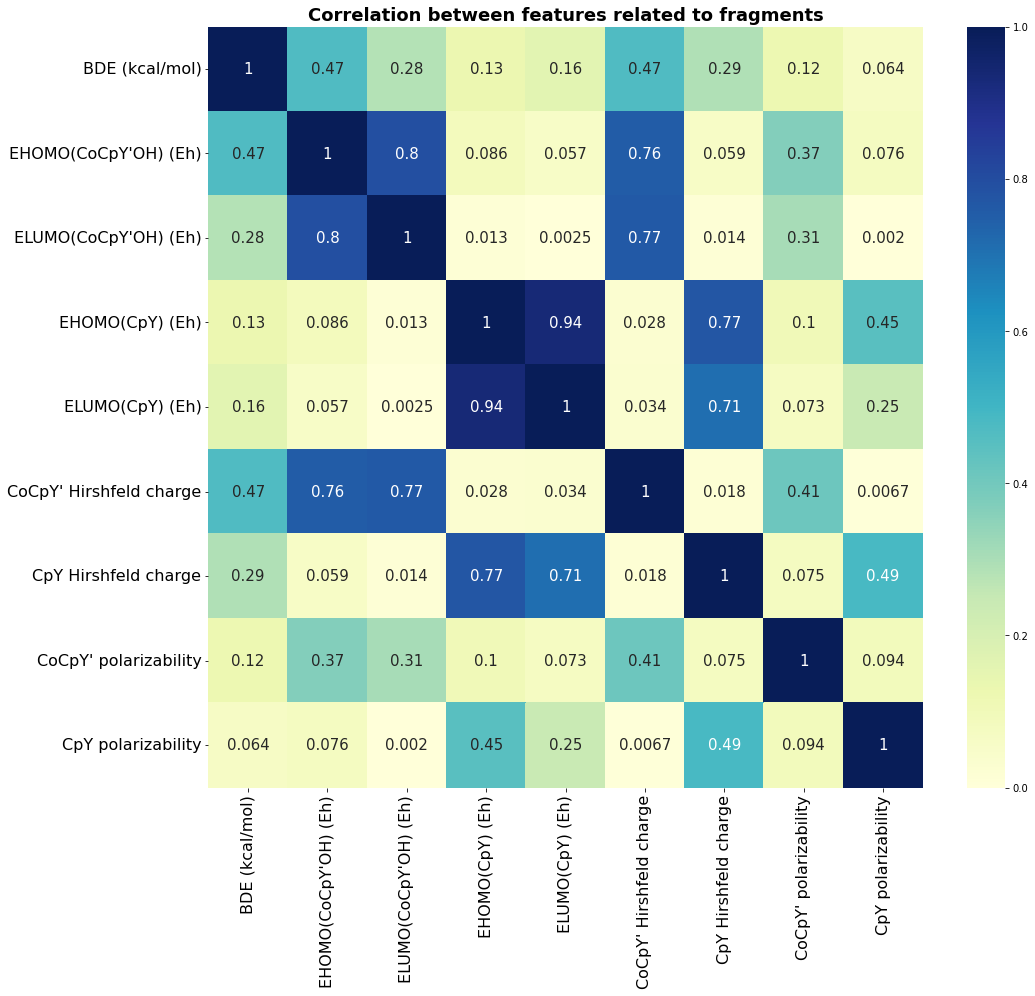

In [276]:
corr = abs(frag.corr())
plt.figure(figsize=[16,14])
sns.heatmap(corr, cmap="YlGnBu",  vmin=0.0, vmax=1.0,annot = True, annot_kws={'size': 15})
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.title('Correlation between features related to fragments', fontsize = 18, fontweight = 'bold');

#Statistics

In [277]:
ml_df.describe()

,Co[CpY][CpY']OH energy (Eh),CoCpY'energy (Eh),CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
count,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,-2885.015296,-2078.544199,-806.446835,15.224432,16.170617,-0.191159,-0.086005,-0.214888,-0.085469,-0.200897,-0.117825,0.034738,0.020129,32.582851,48.667438,-32.992052,3.300790,4.008424
std,1343.930437,778.250606,1106.634781,6.629545,3.231558,0.006312,0.011437,0.013198,0.008885,0.021833,0.016527,0.062240,0.050861,29.889890,33.700939,3.965526,0.010104,0.159475
min,-10408.735637,-9411.126546,-7952.631083,3.185810,4.493000,-0.223500,-0.118800,-0.237800,-0.106800,-0.246900,-0.151300,-0.081960,-0.081960,0.265420,0.265420,-46.529125,3.282637,3.691918
25%,-2880.695616,-2220.117477,-768.161154,10.742214,14.038600,-0.191500,-0.093000,-0.224500,-0.092000,-0.216600,-0.125000,-0.024960,-0.015190,12.952910,22.669890,-35.328250,3.292941,3.896393
50%,-2567.428016,-1879.885018,-542.529457,14.245329,16.331700,-0.190000,-0.084900,-0.213300,-0.085100,-0.201000,-0.118300,0.038080,0.011965,24.041310,52.745580,-33.100625,3.298622,3.994029
75%,-2283.371861,-1766.531474,-397.996994,18.345363,18.211100,-0.188400,-0.078200,-0.204500,-0.079400,-0.188600,-0.112600,0.081263,0.057107,43.981350,60.200450,-30.465125,3.305980,4.104762
max,-1845.520993,-1652.003971,-193.474683,42.413274,27.728700,-0.180300,-0.054800,-0.171600,-0.063300,-0.155200,-0.076800,0.160449,0.160449,150.643000,150.643000,-22.935125,3.337480,4.725310


In [278]:
#checking for duplicates
ml_df.duplicated().sum()

0

In [279]:
#checking for missing values
ml_df.isna().sum().sum()

0

In [280]:
ml_df.head()

,Name,Co[CpY][CpY']OH energy (Eh),CoCpY' name,CoCpY'energy (Eh),CpY name,CpY energy (Eh),BDE (kcal/mol),Dipole moment(Debye),EHOMO(Co[CpY][CpY']OH) (Eh),ELUMO(Co[CpY][CpY']OH) (Eh),...,ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge,CoCpY' polarizability,CpY polarizability,Hardness (kcal/mol),dCOM (Å),rCo-O (Å)
0,Co(Cp-N(CH₃)₂)(Cp-N(CH₃)₂)OH,-2113.503825,N(CH₃)₂,-1785.987408,N(CH₃)₂,-327.488954,17.233174,15.5954,-0.1803,-0.0555,...,-0.0719,-0.1594,-0.0809,0.011840,0.01184,27.53932,27.53932,-39.156000,3.337480,3.856084
1,Co(Cp-N(CH₃)₂)(Cp-OCH₃)OH,-2094.048389,OCH₃,-1766.531474,N(CH₃)₂,-327.488954,17.545539,14.9760,-0.1867,-0.0607,...,-0.0727,-0.1594,-0.0809,-0.015190,0.01184,18.01558,27.53932,-39.532500,3.314513,4.150980
2,Co(Cp-N(CH₃)₂)(Cp-O(CO)CH₃)OH,-2207.402596,O(CO)CH₃,-1879.885018,N(CH₃)₂,-327.488954,17.961810,18.7135,-0.1849,-0.0667,...,-0.0855,-0.1594,-0.0809,0.071736,0.01184,27.13368,27.53932,-37.085250,3.312872,4.065847
3,Co(Cp-N(CH₃)₂)(Cp-P(CH₃)₂)OH,-2400.122408,P(CH₃)₂,-2072.607246,N(CH₃)₂,-327.488954,16.445457,19.9044,-0.1862,-0.0659,...,-0.0814,-0.1594,-0.0809,-0.059590,0.01184,43.11939,27.53932,-37.744125,3.333984,4.033683
4,Co(Cp-N(CH₃)₂)(Cp-S(CH₃))OH,-2417.026291,S(CH₃),-2089.514536,N(CH₃)₂,-327.488954,14.308038,14.9101,-0.1868,-0.0654,...,-0.0817,-0.1594,-0.0809,0.019722,0.01184,27.96205,27.53932,-38.089250,3.328151,3.818543


In [281]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 902
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Name                         873 non-null    object 
 1   Co[CpY][CpY']OH energy (Eh)  873 non-null    float64
 2   CoCpY' name                  873 non-null    object 
 3   CoCpY'energy (Eh)            873 non-null    float64
 4   CpY name                     873 non-null    object 
 5   CpY energy (Eh)              873 non-null    float64
 6   BDE (kcal/mol)               873 non-null    float64
 7   Dipole moment(Debye)         873 non-null    float64
 8   EHOMO(Co[CpY][CpY']OH) (Eh)  873 non-null    float64
 9   ELUMO(Co[CpY][CpY']OH) (Eh)  873 non-null    float64
 10  EHOMO(CoCpY'OH) (Eh)         873 non-null    float64
 11  ELUMO(CoCpY'OH) (Eh)         873 non-null    float64
 12  EHOMO(CpY) (Eh)              873 non-null    float64
 13  ELUMO(CpY) (Eh)     

#Validate Split

In [282]:
y = ml_df['BDE (kcal/mol)']
X = ml_df[["EHOMO(CoCpY'OH) (Eh)", "ELUMO(CoCpY'OH) (Eh)", "EHOMO(CpY) (Eh)", "ELUMO(CpY) (Eh)", "CoCpY' Hirshfeld charge", "CpY Hirshfeld charge"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [283]:
X_train

,EHOMO(CoCpY'OH) (Eh),ELUMO(CoCpY'OH) (Eh),EHOMO(CpY) (Eh),ELUMO(CpY) (Eh),CoCpY' Hirshfeld charge,CpY Hirshfeld charge
430,-0.2131,-0.0789,-0.2027,-0.1250,-0.050620,0.024095
79,-0.1956,-0.0633,-0.1886,-0.1003,-0.041080,-0.015190
148,-0.2133,-0.0814,-0.2469,-0.1496,-0.059590,0.132226
409,-0.2131,-0.0789,-0.2190,-0.1256,-0.050620,0.083209
440,-0.2121,-0.0807,-0.2198,-0.1243,0.079571,0.084139
...,...,...,...,...,...,...
106,-0.2297,-0.0944,-0.2092,-0.1170,0.156189,0.071736
270,-0.2003,-0.0802,-0.1552,-0.0768,0.008470,-0.081960
890,-0.2060,-0.0794,-0.1552,-0.0768,-0.042140,-0.081960
436,-0.2131,-0.0789,-0.1952,-0.1163,-0.050620,-0.040350


#Functions

## Evaluvation

In [284]:
#function for evaluation
def eval_model(pipe, X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  eval_results = pd.DataFrame(columns = ['Metrics','Train Score', 'Test Score'])
  train_mae = mean_absolute_error(y_train, pipe.predict(X_train))
  test_mae = mean_absolute_error(y_test, pipe.predict(X_test))

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  eval_results.loc[1, 'Metrics'] = 'MAE'
  eval_results.loc[2, 'Metrics'] = 'MSE'
  eval_results.loc[3, 'Metrics'] = 'RMSE'
  eval_results.loc[4, 'Metrics'] = 'R2'

  eval_results.loc[1, 'Train Score'] = train_mae
  eval_results.loc[2, 'Train Score'] = train_mse
  eval_results.loc[3, 'Train Score'] = train_rmse
  eval_results.loc[4, 'Train Score'] = train_r2

  eval_results.loc[1, 'Test Score'] = test_mae
  eval_results.loc[2, 'Test Score'] = test_mse
  eval_results.loc[3, 'Test Score'] = test_rmse
  eval_results.loc[4, 'Test Score'] = test_r2

  return eval_results

In [285]:
#function for final evaluation
def eval_model_final(pipe, 
                     X_train=X_train, y_train=y_train, 
                     X_test=X_test , y_test= y_test):

  train_mse = mean_squared_error(y_train, pipe.predict(X_train))
  test_mse = mean_squared_error(y_test, pipe.predict(X_test))

  train_rmse = np.sqrt(train_mse)
  test_rmse = np.sqrt(test_mse)

  train_r2 = r2_score(y_train, pipe.predict(X_train))
  test_r2 = r2_score(y_test, pipe.predict(X_test))

  return (train_r2, test_r2, round(train_rmse,6), round(test_rmse,6))

## Plot

In [286]:
def train_test_plot(model_name, pipe,  X_train=X_train, y_train=y_train, X_test=X_test , y_test= y_test):
  fig, axes = plt.subplots(nrows = 1, ncols=2, figsize=(12,4))
#subplot1
  ax = sns.regplot(x = y_train, 
                   y = pipe.predict(X_train), 
                   line_kws = {'color':'black', 'ls': ':', 'label' :f'R$^2$ = {round(r2_score(y_train, pipe.predict(X_train)), 6)}'}, 
                   ax=axes[0],
                   )
  axes[0].set_title('Train Data', fontweight = 'bold')
  axes[0].set_xlabel('Actual BDE (kcal/mol)')
  axes[0].set_ylabel('Predicted BDE (kcal/mol)');

#subplot2
  ax = sns.regplot(x = y_test, 
                   y = pipe.predict(X_test), 
                   line_kws = {'color':'black', 'ls': ':', 
                   'label' : f'R$^2$ = {round(r2_score(y_test, pipe.predict(X_test)), 6)}'}, 
                   ax=axes[1])
  axes[1].set_title('Test Data', fontweight = 'bold')
  axes[1].set_xlabel('Actual BDE (kcal/mol)')
  axes[1].set_ylabel('Predicted BDE (kcal/mol)')
  
  fig.suptitle(f'Train and Test Results of {model_name}', fontsize = 20, fontweight = 'bold', y = 1.1)
  [ax.legend() for ax in axes];
  return (fig, axes)

#Data Preprocessing

## Instantiate colimn transformers

In [287]:
scaler = StandardScaler()

# Linear Regression Model

In [288]:
lr = LinearRegression()
lr_pipe = make_pipeline(scaler, lr)
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [289]:
#evaluvation of linear rigression
eval_model(lr_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.979453,3.068536
2,MSE,23.590921,26.731918
3,RMSE,4.857049,5.170292
4,R2,0.459858,0.400263


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ef83a890>,
       dtype=object))

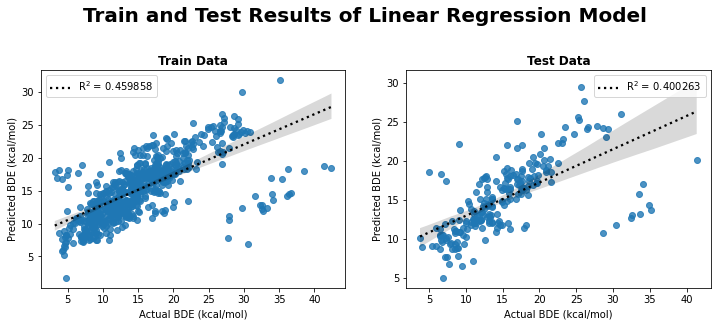

In [290]:
train_test_plot('Linear Regression Model', lr_pipe)

#Decision Tree Model

In [291]:
dt = DecisionTreeRegressor(random_state = 42)
dt_pipe = make_pipeline(scaler, dt)
dt_pipe.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [292]:
#evaluvation of initial decision tree
eval_model(dt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.0,2.297034
2,MSE,0.0,22.243441
3,RMSE,0.0,4.716295
4,R2,1.0,0.500963


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ef7deb90>,
       dtype=object))

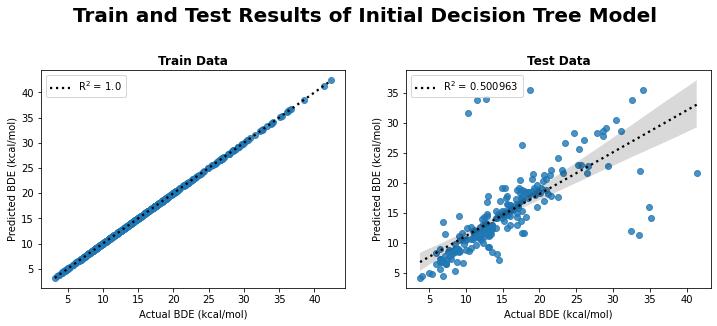

In [293]:
train_test_plot('Initial Decision Tree Model', dt_pipe)

#Bagged Tree Model

In [294]:
bt = BaggingRegressor(random_state = 42)
bt_pipe = make_pipeline(scaler, bt)
bt_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [295]:
#evaluvation of initial bagged tree
eval_model(bt_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.662925,1.870592
2,MSE,1.373204,10.762181
3,RMSE,1.171838,3.280576
4,R2,0.968559,0.758548


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ef6d4b90>,
       dtype=object))

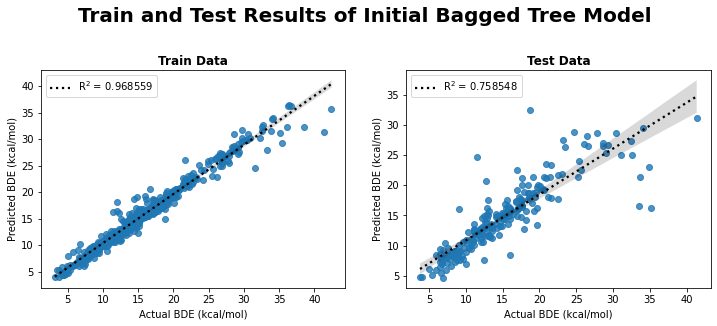

In [296]:
train_test_plot('Initial Bagged Tree Model', bt_pipe)

# K-Nearest Neighbors Model

In [297]:
knn = KNeighborsRegressor()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train, y_train) 

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsregressor', KNeighborsRegressor())])

In [298]:
#evaluvation of initial knn
eval_model(knn_pipe)

,Metrics,Train Score,Test Score
1,MAE,2.202204,3.136901
2,MSE,13.104078,25.464302
3,RMSE,3.619956,5.046217
4,R2,0.699967,0.428702


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ef832910>,
       dtype=object))

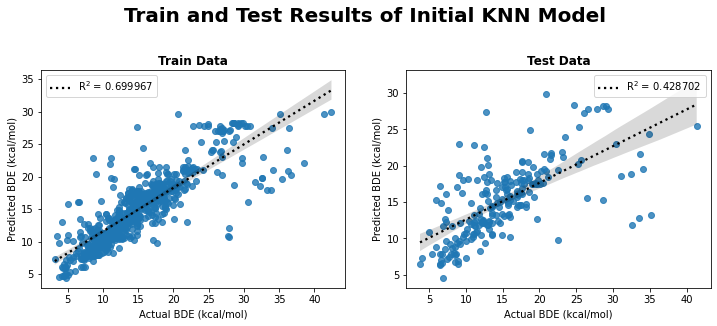

In [299]:
train_test_plot('Initial KNN Model', knn_pipe)

# Random Forest Model

In [300]:
rf = RandomForestRegressor(random_state= 42)
rf_pipe = make_pipeline(scaler, rf)
rf_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [301]:
#evaluvation of initial bagged tree
eval_model(rf_pipe)

,Metrics,Train Score,Test Score
1,MAE,0.536732,1.703929
2,MSE,0.782414,9.134505
3,RMSE,0.884542,3.022334
4,R2,0.982086,0.795065


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ef4cbad0>,
       dtype=object))

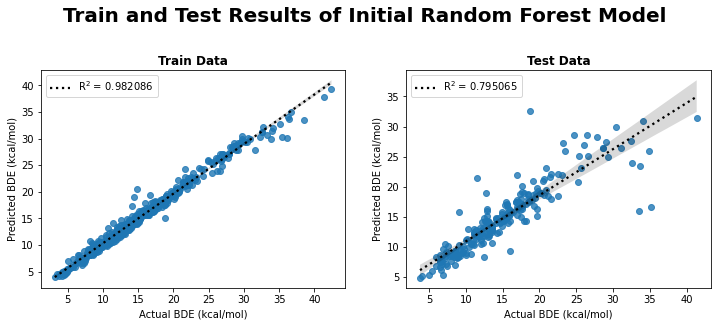

In [302]:
train_test_plot('Initial Random Forest Model', rf_pipe)

#Evaluvation of initial models

In [303]:
model = ['Linear Regression', 'Decision Tree', 'Bagged Tree', 'KNN', 'Random Forest']
pipe = [lr_pipe, dt_pipe, bt_pipe, knn_pipe, rf_pipe]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [304]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Linear Regression,0.459858,0.400263,4.857049,5.170292
Decision Tree,1.0,0.500963,0.0,4.716295
Bagged Tree,0.968559,0.758548,1.171838,3.280576
KNN,0.699967,0.428702,3.619956,5.046217
Random Forest,0.982086,0.795065,0.884542,3.022334


- According to the train and test RMSE values for the models;
  - all models have overfilling issue and decision tree has the highest overfittin problem.
- Out of these 5 models, random forest and bagged tree are selected based on the test R$^2$ score to do further optimizations.


#Tunning Hyperparametrs and cross validation of models

## For Random Forest

In [305]:
#parametrs of random forest model
rf_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('randomforestregressor', RandomForestRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'randomforestregressor': RandomForestRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'randomforestregressor__bootstrap': True,
 'randomforestregressor__ccp_alpha': 0.0,
 'randomforestregressor__criterion': 'squared_error',
 'randomforestregressor__max_depth': None,
 'randomforestregressor__max_features': 'auto',
 'randomforestregressor__max_leaf_nodes': None,
 'randomforestregressor__max_samples': None,
 'randomforestregressor__min_impurity_decrease': 0.0,
 'randomforestregressor__min_samples_leaf': 1,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__min_weight_fraction_leaf': 0.0,
 'randomforestregressor__n_estimators': 100,
 'randomforestregressor__n_jobs': None,
 'randomforestregressor__o

In [306]:
#maximum max_depth value of estimators of rf 
est_depth = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depth)

23

In [307]:
rf_param_grid = {'randomforestregressor__n_estimators':[25,50,75,100,125,150,175,200],
                 'randomforestregressor__max_depth': range(5, 50, 5)}

In [308]:
rf_pipe_gs = GridSearchCV(rf_pipe, rf_param_grid, cv =5)
rf_pipe_gs.fit(X_train, y_train);


In [309]:
print(f'Best parameters: {rf_pipe_gs.best_params_}')

Best parameters: {'randomforestregressor__max_depth': 25, 'randomforestregressor__n_estimators': 50}


In [310]:
rf_opt = rf_pipe_gs.best_estimator_
rf_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=25, n_estimators=50,
                                       random_state=42))])

In [311]:
eval_model(rf_opt)

,Metrics,Train Score,Test Score
1,MAE,0.564383,1.736653
2,MSE,0.873664,8.975243
3,RMSE,0.9347,2.995871
4,R2,0.979996,0.798638


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6ef34f7d0>,
       dtype=object))

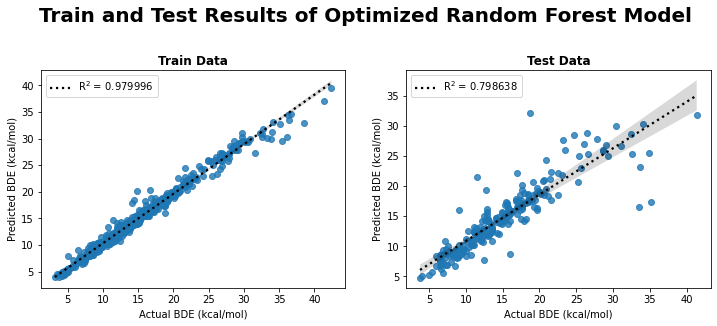

In [312]:
train_test_plot('Optimized Random Forest Model', rf_opt)

## For Bagged Tree

In [313]:
#parametrs of decision tree model
bt_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('baggingregressor', BaggingRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'baggingregressor': BaggingRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'baggingregressor__base_estimator': None,
 'baggingregressor__bootstrap': True,
 'baggingregressor__bootstrap_features': False,
 'baggingregressor__max_features': 1.0,
 'baggingregressor__max_samples': 1.0,
 'baggingregressor__n_estimators': 10,
 'baggingregressor__n_jobs': None,
 'baggingregressor__oob_score': False,
 'baggingregressor__random_state': 42,
 'baggingregressor__verbose': 0,
 'baggingregressor__warm_start': False}

In [314]:
bt_param_grid = {'baggingregressor__n_estimators':range(10, 80, 10)}

In [315]:
bt_pipe_gs = GridSearchCV(bt_pipe, bt_param_grid, cv=5)
bt_pipe_gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('baggingregressor',
                                        BaggingRegressor(random_state=42))]),
             param_grid={'baggingregressor__n_estimators': range(10, 80, 10)})

In [316]:
print(f'Best parameters: {bt_pipe_gs.best_params_}')

Best parameters: {'baggingregressor__n_estimators': 60}


In [317]:
bt_opt = bt_pipe_gs.best_estimator_
bt_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=60, random_state=42))])

In [318]:
eval_model(bt_opt)

,Metrics,Train Score,Test Score
1,MAE,0.550939,1.711683
2,MSE,0.831883,8.827774
3,RMSE,0.912076,2.971157
4,R2,0.980953,0.801947


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f26de8d0>,
       dtype=object))

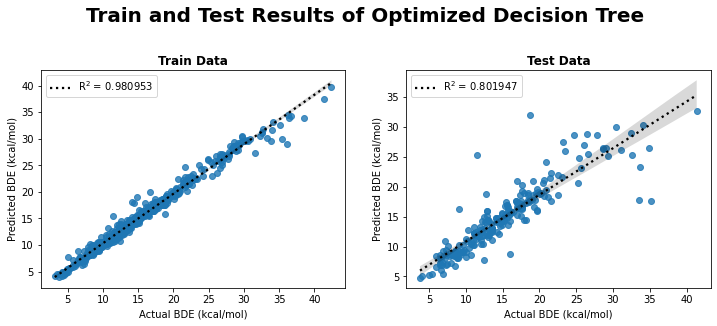

In [319]:
train_test_plot('Optimized Decision Tree', bt_opt)

## For Decision Tree

In [320]:
#parametrs of decision tree model
dt_pipe.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('decisiontreeregressor', DecisionTreeRegressor(random_state=42))],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'decisiontreeregressor': DecisionTreeRegressor(random_state=42),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'decisiontreeregressor__ccp_alpha': 0.0,
 'decisiontreeregressor__criterion': 'squared_error',
 'decisiontreeregressor__max_depth': None,
 'decisiontreeregressor__max_features': None,
 'decisiontreeregressor__max_leaf_nodes': None,
 'decisiontreeregressor__min_impurity_decrease': 0.0,
 'decisiontreeregressor__min_samples_leaf': 1,
 'decisiontreeregressor__min_samples_split': 2,
 'decisiontreeregressor__min_weight_fraction_leaf': 0.0,
 'decisiontreeregressor__random_state': 42,
 'decisiontreeregressor__splitter': 'best'}

In [321]:
#max_depth value of dt modell
dt.get_depth()

21

In [322]:
dt_param_grid = {'decisiontreeregressor__max_depth':range(0,25,3)}

In [323]:
dt_pipe_gs = GridSearchCV(dt_pipe, dt_param_grid, cv =5)
dt_pipe_gs.fit(X_train, y_train);


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 1320, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/skl

In [324]:
print(f'Best parameters: {dt_pipe_gs.best_params_}')

Best parameters: {'decisiontreeregressor__max_depth': 12}


In [325]:
dt_opt = dt_pipe_gs.best_estimator_
dt_opt.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=12, random_state=42))])

In [326]:
eval_model(dt_opt)

,Metrics,Train Score,Test Score
1,MAE,0.414544,2.157113
2,MSE,0.752578,18.028879
3,RMSE,0.867512,4.246043
4,R2,0.982769,0.595518


(<Figure size 864x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f0ef8090>,
       dtype=object))

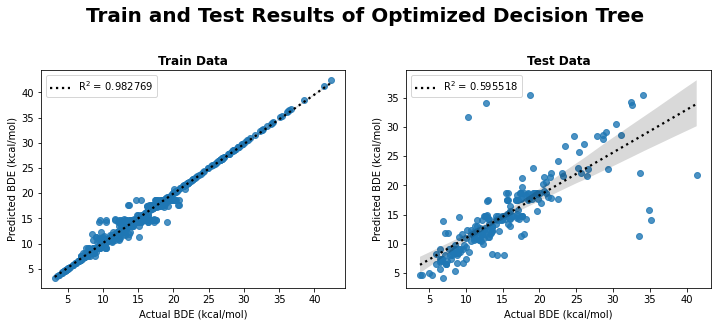

In [327]:
train_test_plot('Optimized Decision Tree', dt_opt)

#Evaluvation of optimized models

In [328]:
model = ['Random Forest', 'Bagged Tree', 'Decision Tree']
pipe = [rf_opt, bt_opt, dt_opt]
final_eval_results = pd.DataFrame(columns = ['Model','Train R2', 'Test R2', 'Train RMSE (kcal/mol)', 'Test RMSE (kcal/mol)'])

for i in range(len(model)):
  final_eval_results.loc[i, 'Model'] = model[i]
  final_eval_results.loc[i,'Train R2'], final_eval_results.loc[i,'Test R2'], final_eval_results.loc[i,'Train RMSE (kcal/mol)'], final_eval_results.loc[i,'Test RMSE (kcal/mol)'] = eval_model_final(pipe[i])

In [329]:
final_eval_results.set_index('Model', inplace = True) 
final_eval_results

,Train R2,Test R2,Train RMSE (kcal/mol),Test RMSE (kcal/mol)
Model,,,,
Random Forest,0.979996,0.798638,0.9347,2.995871
Bagged Tree,0.980953,0.801947,0.912076,2.971157
Decision Tree,0.982769,0.595518,0.867512,4.246043


Acording to the above scores for optimized models, bagged tree  regression model is selected as the best ML model since it gained the highest R$^2$ score and lowest train and test RMSE scores.